Media de 10 amostras: 0.3055
Media de 100 amostras: 0.29896499999999987
Desvio padrão de 10 amostras: 0.010162020796409878
Desvio padrão de 100 amostras: 0.009886650524108693


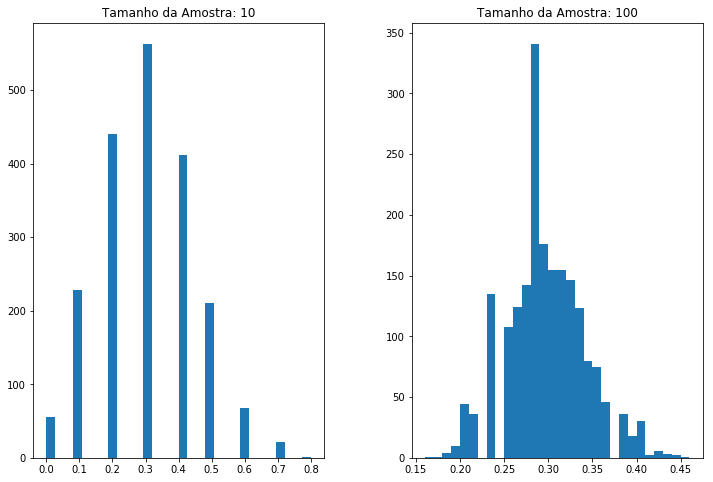

In [20]:
# ME323C - 1o semestre 2019 - RA 044628 Leonardo Glavina da Cruz
#
# Este script visa simular uma eleição, como vimos teoricamente em amostragem e o Teorema do Limite Central

import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

def opiniao_pesssoa_aleatoria():
    # Opiniao de uma pessoal aleatoria, binomial, com o valor da probabilidade determinado 
    
    probabilidade_vitoria_A = 0.30
    return np.random.binomial(
        n = 1,
        p = probabilidade_vitoria_A)

opiniao_pesssoa_aleatoria()


def amostra_aleatoria(n):
    # Cria um vetor de tamanho n, binomial 1 se o entrevistado votou no candidato A e 0 se votou no candidato B 
    
    opinioes_amostra = []
    for i in range(n):
        opinioes_amostra.append(opiniao_pesssoa_aleatoria())
    
    return opinioes_amostra


def n_amostras_aleatorias(numero_amostras, tamanho_amostras):
    # Registra multiplas amostras da distribuicao aleatoria 
    
    n_amostras = [tamanho_amostras] * numero_amostras
    total_amostras = list(map(amostra_aleatoria, n_amostras))
    return total_amostras

def p_chapeu(numero_amostras, tamanho_amostras):
    # Cria a proporcao amostral de votos no candidato A 
    
    amostras = n_amostras_aleatorias(
        numero_amostras = numero_amostras,
        tamanho_amostras = tamanho_amostras)

    return list(map(np.mean, amostras))

    
fig, axes = plt.subplots(1,2, figsize = (12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.ravel()

media = 0
tamanho_amostras = [10, 100]
for i in range(len(tamanho_amostras)):
    media_amostras = p_chapeu(
        numero_amostras = 2000,
        tamanho_amostras = tamanho_amostras[i])   
    axes[i].hist(media_amostras, bins=30)
    axes[i].set_title("Tamanho da Amostra: {0}".format(tamanho_amostras[i]))

media10 = sum(p_chapeu(10, 2000))/len(p_chapeu(10, 2000))
media100 = sum(p_chapeu(100, 2000))/len(p_chapeu(100, 2000))

print("Media de 10 amostras:", media10)
print("Media de 100 amostras:", media100)

desvio_padrao10 = statistics.stdev(p_chapeu(10, 2000))
desvio_padrao100 = statistics.stdev(p_chapeu(100, 2000))
    
print("Desvio padrão de 10 amostras:", desvio_padrao10)
print("Desvio padrão de 100 amostras:", desvio_padrao100)

    